# **Lab 2: Elasticnet**


## Exercise 2: Elasticnet & Data Splitting

You will now work on a new dataset called "Auto MPG" from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

You will loading the dataset from this link:
https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab02/ex2/auto_mpg.csv

This dataset contains the fuel consumption in miles per gallon ("mpg") of 398 cars. Your goal is to build an Elasticnet model to predict the mpg.

The steps are:

1.   Load and Explore Dataset
2.   Data Preparation
3.   Split Datasets
4.   Assess Baseline Model
5.   Train Ridge Model with all Features
6.   Train Lasso Model with all Features
7.   Train Elasticnet Model with all Features

---
### 0. Setup Environment

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36106"
LAB = "lab02"
EXE = "ex02"
DATA = "data"

lab_path = f"{COURSE}/labs/{LAB}/{EXE}"
root_path = "./"

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("###### Install required Python packages ######")
    ! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

    print("\n###### Connect to personal Google Drive ######")
    drive.mount("/content/gdrive")

    root_path = "/content/gdrive/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = f"{root_path}/{lab_path}/"
root_path = Path(folder_path)
root_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in:")
%cd {folder_path}


###### Install required Python packages ######

###### Connect to personal Google Drive ######
Mounted at /content/gdrive

###### Setting up folders ######

You can now save your data files in:
/content/gdrive/MyDrive/36106/labs/lab02/ex02


### 1. Load and Explore Dataset

**[1.1]** Import the pandas, numpy and altair packages

In [ ]:
import pandas as pd

**[1.2]** Create a variable called `file_url` containing the link to the CSV file

In [ ]:
file_url = 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab02/ex2/auto_mpg.csv'

**[1.3]** Load the dataset into dataframe called `df`

In [ ]:
df = pd.read_csv(file_url)

**[1.4]** Display the first 5 rows of `df`

In [ ]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_USA,origin_EU,origin_JP
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


**[1.5]** Display the last 5 rows of `df`

In [ ]:
df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_USA,origin_EU,origin_JP
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720,19.4,82,1,0,0


**[1.6]** Display the dimensions (shape) of `df`

In [ ]:
df.shape

(398, 10)

**[1.7]** Display the list of columns of `df`

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_USA', 'origin_EU', 'origin_JP'],
      dtype='object')

**[1.8]** Display the descriptive statistics of `df`


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_USA,origin_EU,origin_JP
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


**[1.9]** Display the summary (info) of `df`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin_USA    398 non-null    int64  
 8   origin_EU     398 non-null    int64  
 9   origin_JP     398 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.2 KB


### 2. Data Preparation

**[2.1]** Let's create a copy of our dataframe called `df_cleaned`

In [ ]:
df_cleaned = df.copy()

**[2.2]** Display the observations with missing values in `horsepower`

In [ ]:
df_cleaned[df_cleaned['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_USA,origin_EU,origin_JP
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


**[2.3]** Replace all `horsepower` missing values with its mean

In [ ]:
horsepower_mean = df_cleaned['horsepower'].mean()
df_cleaned['horsepower'] = df_cleaned['horsepower'].fillna(horsepower_mean)

**[2.4]** Check there is no missing value for all columns


In [ ]:
df_cleaned.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin_USA,0
origin_EU,0
origin_JP,0


### 3. Split Datasets

Note: If you are stuck in previous steps, you can dowload the content of df_cleaned here: https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab02/ex2/df_cleaned.csv

**[3.1]** Extract the target variable into a variable called `y`

In [ ]:
y = df_cleaned.pop('mpg')

**[3.2]** Save all the features into a variable called `X`

In [ ]:
X = df_cleaned


**[3.3]** Import train_test_split from sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split


**[3.4]** Split the features and target variable into a training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**[3.5]** Print the dimensions of these sets

In [ ]:


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (318, 9)
X_test shape: (80, 9)
y_train shape: (318,)
y_test shape: (80,)


### 4. Assess Baseline Model

**[4.1]** Import the DummyRegressor module from sklearn

In [ ]:
from sklearn.dummy import DummyRegressor

**[4.2]** Instantiate the Dummy class into a variable called `base_reg` and fit it on the training set it

In [ ]:
base_reg = DummyRegressor()
base_reg.fit(X_train, y_train)

DummyRegressor()

**[4.3]** Import the RMSE and MAE from sklearn

In [ ]:


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


y_pred_base = base_reg.predict(X_test)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
mae_base = mean_absolute_error(y_test, y_pred_base)




**[4.4]** Display the RMSE and MAE scores of this baseline model

In [ ]:


print(f"Baseline Model RMSE: {rmse_base}")
print(f"Baseline Model MAE: {mae_base}")


Baseline Model RMSE: 7.347332711991268
Baseline Model MAE: 5.955408805031446


### 5. Train Ridge Model with all Features

**[5.1]** Import the Ridge regression module from sklearn

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression


**[5.2]** instantiate the LinearRegression class into a variable called `reg1`

In [ ]:
reg1 = LinearRegression()


**[5.3]** Task: Fit the model with the prepared data

In [ ]:


import numpy as np
reg1.fit(X_train, y_train)
y_pred_reg1 = reg1.predict(X_test)
rmse_reg1 = np.sqrt(mean_squared_error(y_test, y_pred_reg1))
mae_reg1 = mean_absolute_error(y_test, y_pred_reg1)
print(f"Ridge Model RMSE: {rmse_reg1}")
print(f"Ridge Model MAE: {mae_reg1}")


Ridge Model RMSE: 2.8877573478836305
Ridge Model MAE: 2.287586770442105


**[5.4]** Use the trained model to predict the outcome on `X_train` and save them into `y_preds`

In [ ]:
y_preds = reg1.predict(X_train)


**[5.5]** Display the RMSE and MAE scores on the training set

In [ ]:

rmse_train = np.sqrt(mean_squared_error(y_train, y_preds))
mae_train = mean_absolute_error(y_train, y_preds)
print(f"Ridge Model RMSE on training set: {rmse_train}")
print(f"Ridge Model MAE on training set: {mae_train}")


Ridge Model RMSE on training set: 3.3702735639389054
Ridge Model MAE on training set: 2.605484693771035


**[5.6]** Display the RMSE and MAE scores on the testing set

**[5.7]** Display the predictions versus the target line charts on the training set

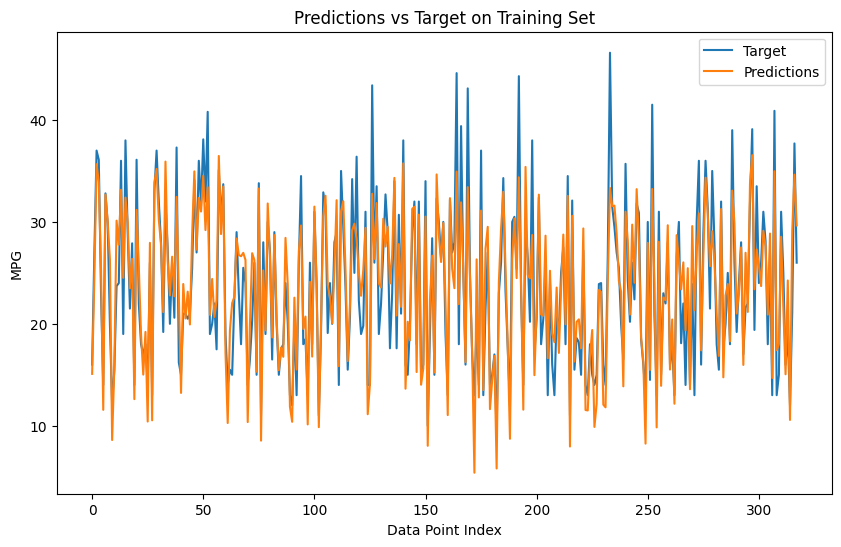

In [ ]:
# Placeholder for student's code

**[5.8]** Display the predictions versus the target line charts on the testing set

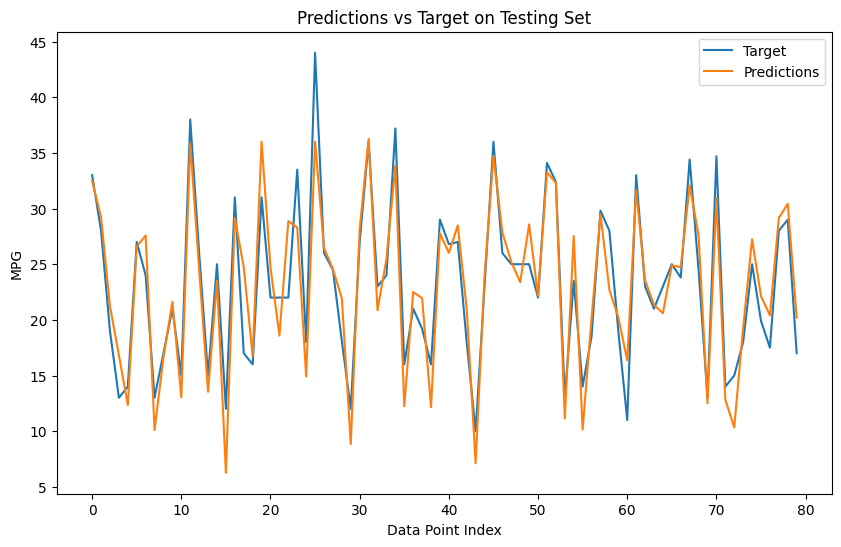

In [ ]:
# Placeholder for student's code

### 6. Train Lasso Model with all Features

**[6.1]** Import the Lasso regression module from sklearn

In [ ]:
from sklearn.linear_model import Lasso


**[6.2]** Instantiate the Lasso class into a variable called `reg2` and fit it with `X_train`

In [ ]:
reg2 = Lasso()
reg2.fit(X_train, y_train)

Lasso()

**[6.3]** Print the RMSE and MAE scores for the training set

In [ ]:

y_preds = reg2.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_preds))
mae_train = mean_absolute_error(y_train, y_preds)
print(f"Lasso Model RMSE on training set: {rmse_train}")
print(f"Lasso Model MAE on training set: {mae_train}")


Lasso Model RMSE on training set: 3.5222972726026702
Lasso Model MAE on training set: 2.6805947075583765


**[6.4]** Print the RMSE and MAE scores for the testing set

In [ ]:

y_preds = reg2.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_preds))
mae_test = mean_absolute_error(y_test, y_preds)
print(f"Lasso Model RMSE on testing set: {rmse_test}")
print(f"Lasso Model MAE on testing set: {mae_test}")


Lasso Model RMSE on testing set: 3.0186081459916188
Lasso Model MAE on testing set: 2.4227519401354085


**[6.5]** Display the predictions versus the target line charts on the training set

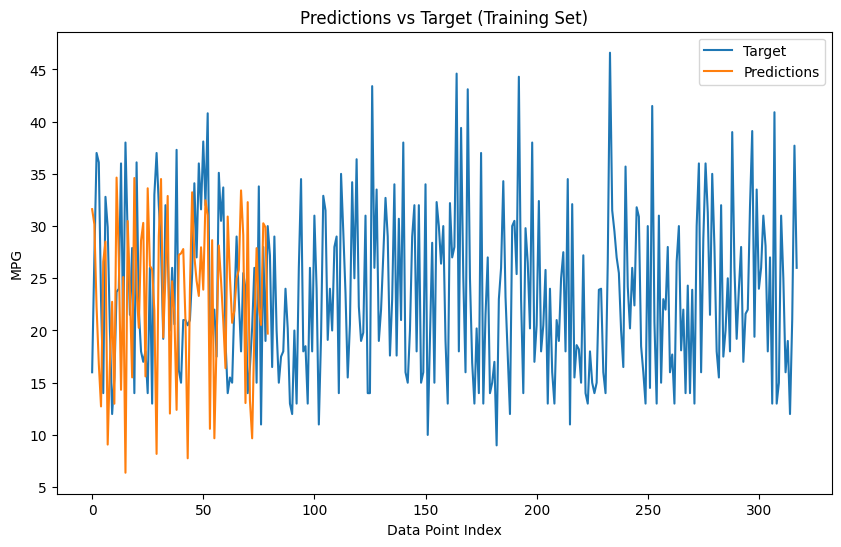

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Target')
plt.plot(y_preds, label='Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('MPG')
plt.title('Predictions vs Target (Training Set)')
plt.legend()
plt.show()


**[6.6]** Display the predictions versus the target line charts on the testing set

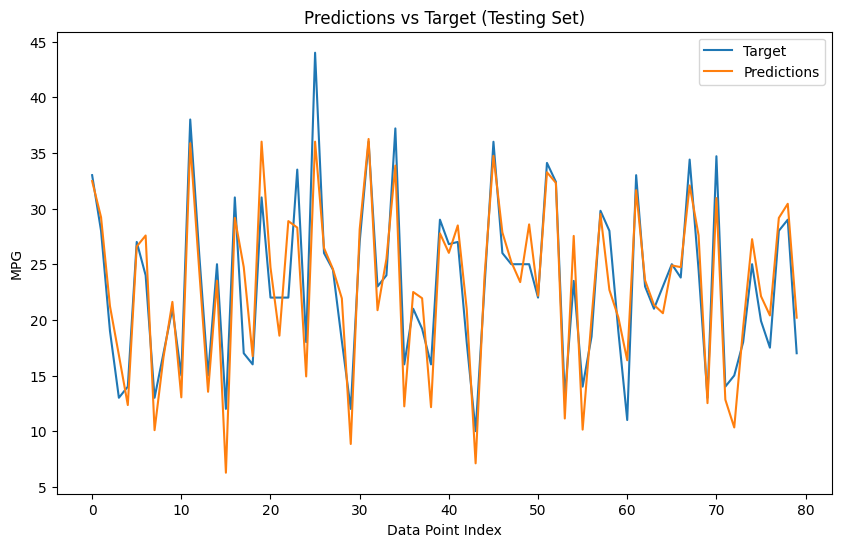

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Target')
plt.plot(y_pred_reg1, label='Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('MPG')
plt.title('Predictions vs Target (Testing Set)')
plt.legend()
plt.show()


### 7. Train Elastic Model with all Features

**[7.1]** Import the ElasticNet regression module from sklearn

In [ ]:


from sklearn.linear_model import ElasticNet


**[7.2]** Instantiate the Elasticnet class into a variable called `reg3` and fit it with `X_train`

In [ ]:

reg3 = ElasticNet()
reg3.fit(X_train, y_train)


ElasticNet()

**[7.3]** Print the RMSE and MAE scores for the training set

In [ ]:

y_preds = reg3.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_preds))
mae_train = mean_absolute_error(y_train, y_preds)
print(f"ElasticNet Model RMSE on training set: {rmse_train}")
print(f"ElasticNet Model MAE on training set: {mae_train}")


ElasticNet Model RMSE on training set: 3.519255447413877
ElasticNet Model MAE on training set: 2.682374303424249


**[7.4]** Print the RMSE and MAE scores for the testing set

In [ ]:

y_preds = reg3.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_preds))
mae_test = mean_absolute_error(y_test, y_preds)
print(f"ElasticNet Model RMSE on testing set: {rmse_test}")
print(f"ElasticNet Model MAE on testing set: {mae_test}")


ElasticNet Model RMSE on testing set: 3.024703919849659
ElasticNet Model MAE on testing set: 2.4272833353348977


**[7.5]** Display the predictions versus the target line charts on the training set

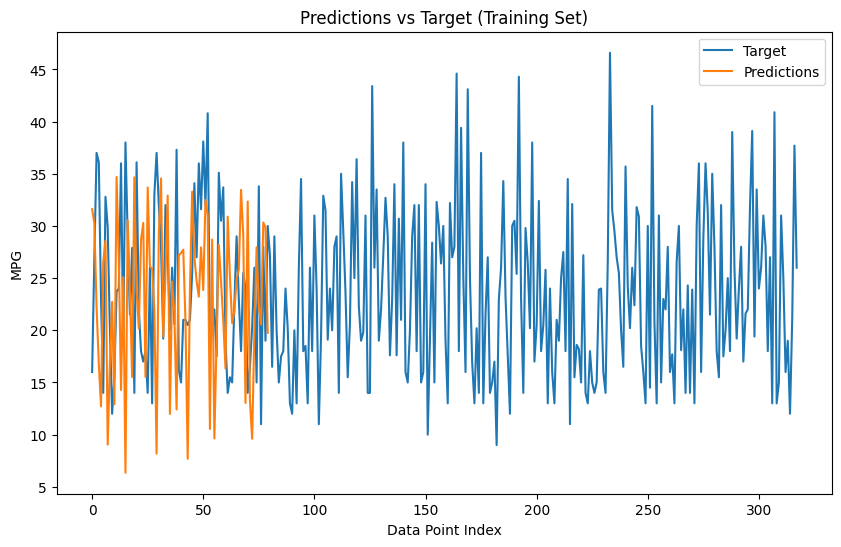

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Target')
plt.plot(y_preds, label='Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('MPG')
plt.title('Predictions vs Target (Training Set)')
plt.legend()
plt.show()


**[7.6]** Display the predictions versus the target line charts on the testing set

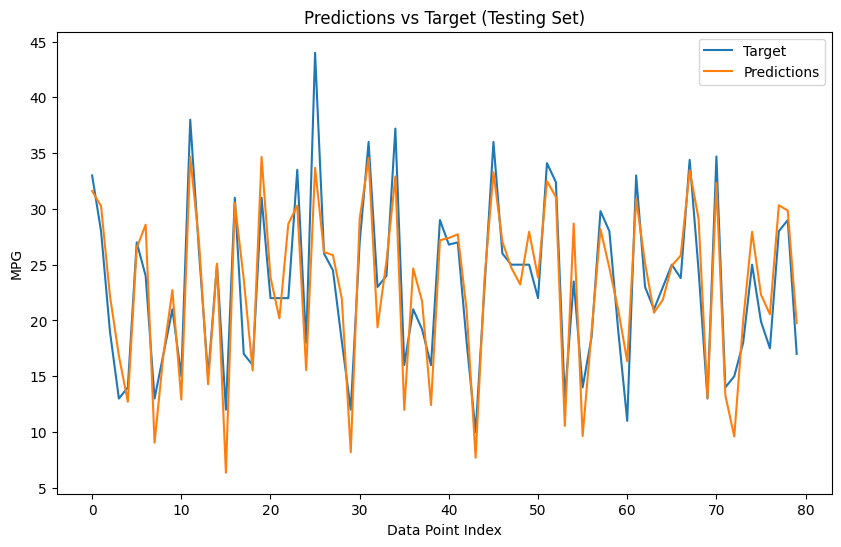

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Target')
plt.plot(y_preds, label='Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('MPG')
plt.title('Predictions vs Target (Testing Set)')
plt.legend()
plt.show()
